In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

2023-11-20 05:15:56.531272: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1))) #28, 28, 32
model.add(keras.layers.MaxPooling2D(2)) #14, 14, 32
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',
                              padding='same')) #14, 14, 64
model.add(keras.layers.MaxPooling2D(2)) #7, 7, 64

model.add(keras.layers.Flatten()) # 
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [4]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 27s 17ms/step - loss: 0.5257 - accuracy: 0.8115 - val_loss: 0.3282 - val_accuracy: 0.8817
Epoch 2/20
   7/1500 [..............................] - ETA: 25s - loss: 0.3891 - accuracy: 0.8304

/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 28s 19ms/step - loss: 0.3512 - accuracy: 0.8737 - val_loss: 0.2815 - val_accuracy: 0.8972
Epoch 3/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.3068 - accuracy: 0.8902 - val_loss: 0.2782 - val_accuracy: 0.8975
Epoch 4/20
1500/1500 [==============================] - 31s 20ms/step - loss: 0.2735 - accuracy: 0.8998 - val_loss: 0.2452 - val_accuracy: 0.9096
Epoch 5/20
1500/1500 [==============================] - 29s 20ms/step - loss: 0.2475 - accuracy: 0.9094 - val_loss: 0.2369 - val_accuracy: 0.9118
Epoch 6/20
1500/1500 [==============================] - 29s 19ms/step - loss: 0.2302 - accuracy: 0.9161 - val_loss: 0.2412 - val_accuracy: 0.9106
Epoch 7/20
1500/1500 [==============================] - 37s 24ms/step - loss: 0.2130 - accuracy: 0.9225 - val_loss: 0.2326 - val_accuracy: 0.9159
Epoch 8/20
1500/1500 [==============================] - 31s 21ms/step - loss: 0.1957 - accuracy: 0.9281 - val_loss: 0.2210 - val_accura

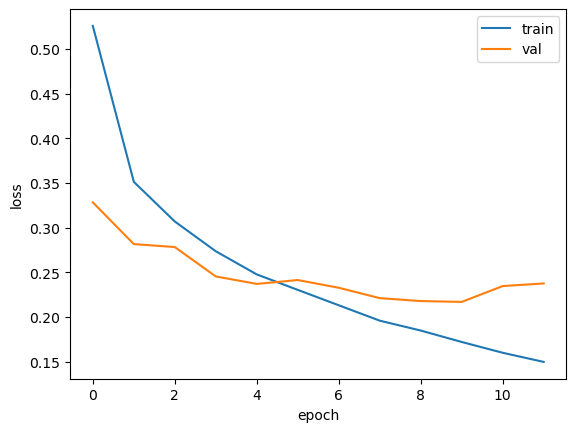

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [7]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 4ms/step - loss: 0.2168 - accuracy: 0.9179


[0.2167646735906601, 0.9179166555404663]

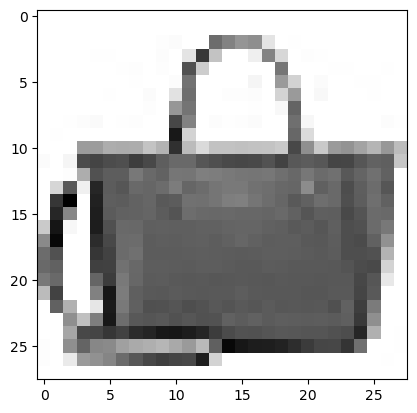

In [8]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [9]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 91ms/step
[[4.3254742e-18 7.9125202e-24 7.7321248e-22 1.2313659e-19 7.1791114e-16
  3.6046943e-17 2.4130885e-18 5.4781547e-21 1.0000000e+00 4.6142829e-21]]


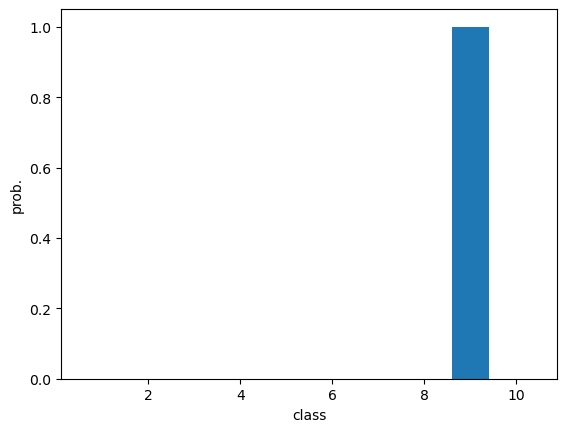

In [10]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [12]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [13]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [14]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 4ms/step - loss: 0.2397 - accuracy: 0.9155


[0.23970769345760345, 0.9154999852180481]